In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from utils_result_analysis import get_df, plot_metric

In [2]:
def get_all_dfs(dataset_name, version, baseline_version=None):
    if baseline_version is None:
        df_baseline = get_df("plain_baseline",  dataset_name, version, "Baseline")
        pass
    else:
        df_baseline = get_df("plain_baseline",  dataset_name, baseline_version, "Baseline")
    
    try:
        df_sketch = get_df("image_sketching", dataset_name, version, "Image Sketching")
    except:
        df_sketch = None
    df_adv = get_df("adversarial_debiasing", dataset_name, version, "Adversarial Debiasing")
    df_base = get_df("base_loss_optimization", dataset_name, version, "BASE Loss")
    df_domain = get_df("domain_independent_learning", dataset_name, version, "Domain Independent Training")
    df_ent = get_df("entangling_disentangling", dataset_name, version, "Entangling Disentangling")
    df_contras = get_df("fair_contrastive", dataset_name, version+"_classifier", "Contrastive Learning")
    df_feat_dist = get_df("fair_feat_distill", dataset_name, version, "Feature Distillation")
    df_orth = get_df("orthogonal_representations", dataset_name, version+"_target", "Orthogonal Representations")
    try:
        df_shared_adv_encoder = get_df("shared_adv_encoder", dataset_name, version, "Adversarial Shared Encoder")
    except:
        df_shared_adv_encoder = None
    
    if df_shared_adv_encoder is None and df_sketch is None:
        return [df_baseline, df_adv, df_base, df_domain, df_ent, df_contras, df_feat_dist, df_orth]
    else:
        return [df_baseline, df_sketch, df_adv, df_base, df_domain, df_ent, df_contras, df_feat_dist, df_orth, df_shared_adv_encoder]

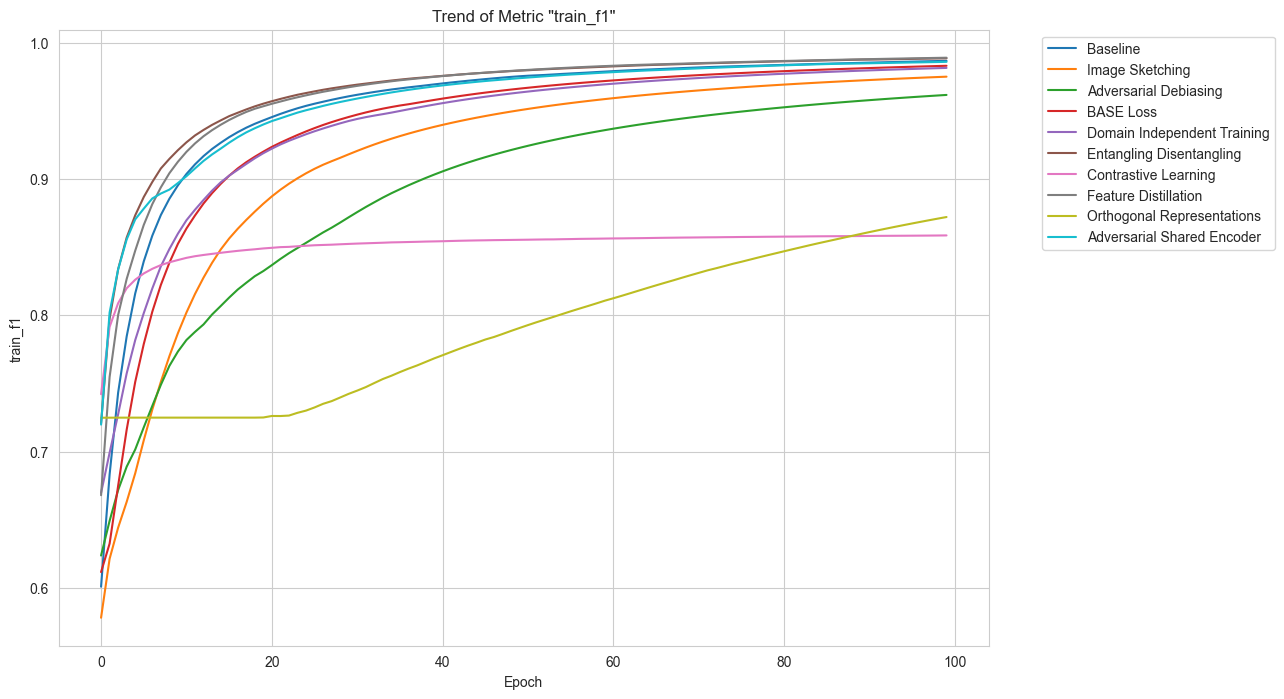

In [5]:
lfw_nose_02 = get_all_dfs("lfw", "skew02_v1_strong_nose", baseline_version="skew02_v1_strong_nose")
plot_metric(lfw_nose_02, "train_f1")

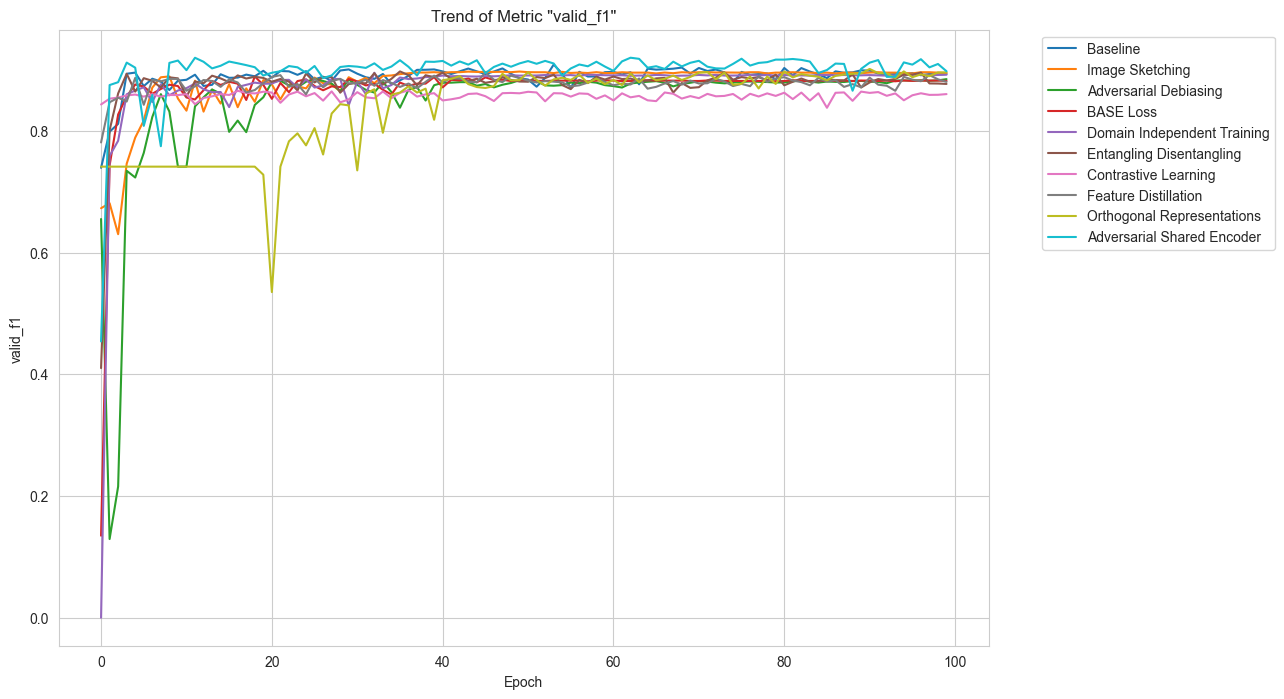

In [15]:
plot_metric(lfw_nose_02, "valid_f1")

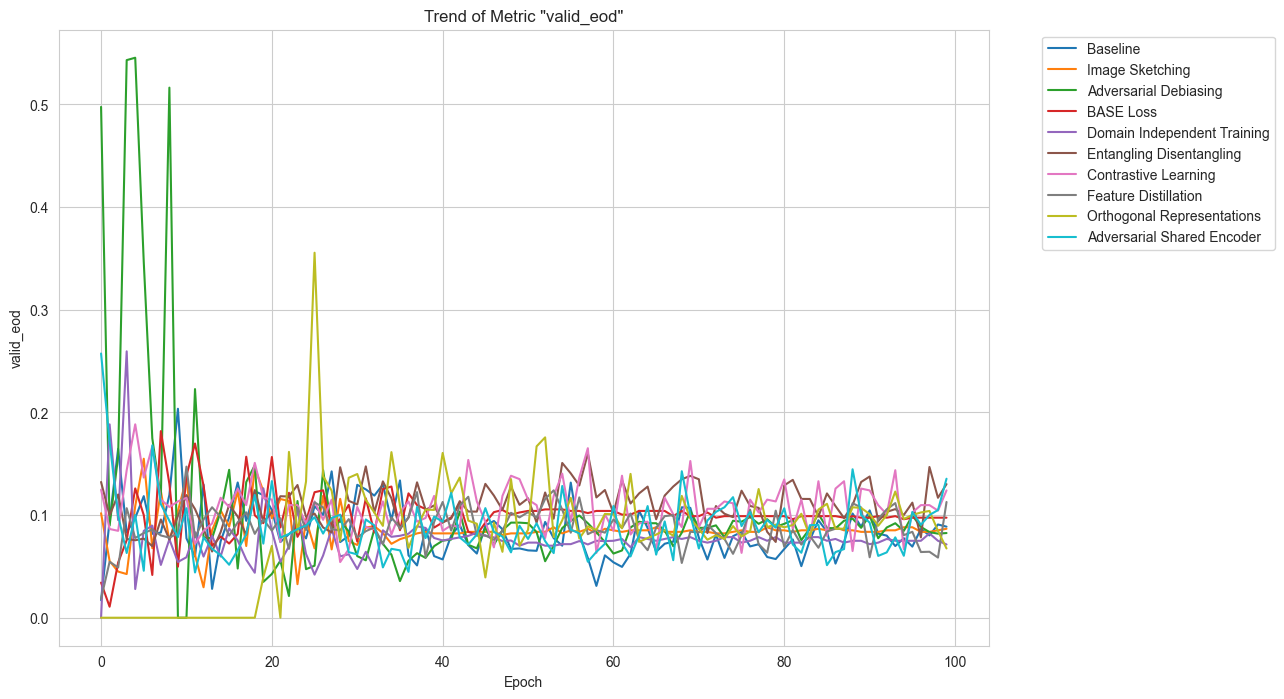

In [12]:
plot_metric(lfw_nose_02, "valid_eod")

## Skew 0.99

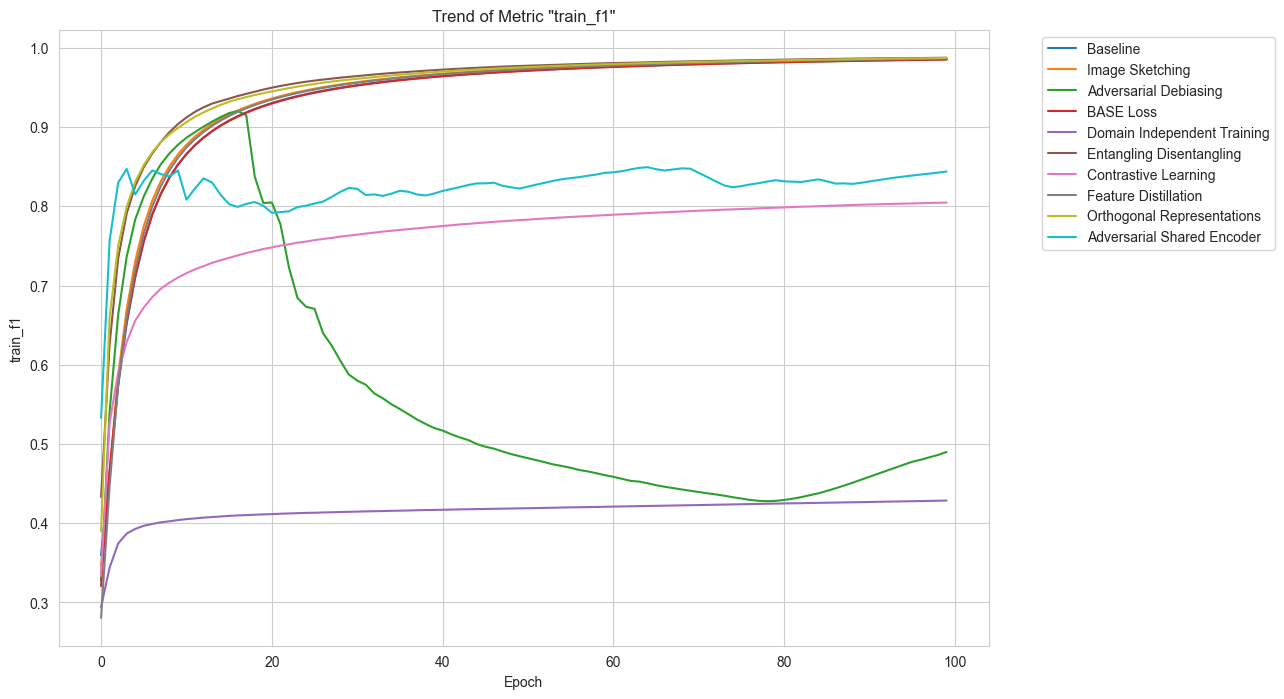

In [7]:
lfw_nose_099 = get_all_dfs("lfw", "skew099_v1_strong_nose", baseline_version="skew099_v1_strong_nose")
plot_metric(lfw_nose_099, "train_f1")

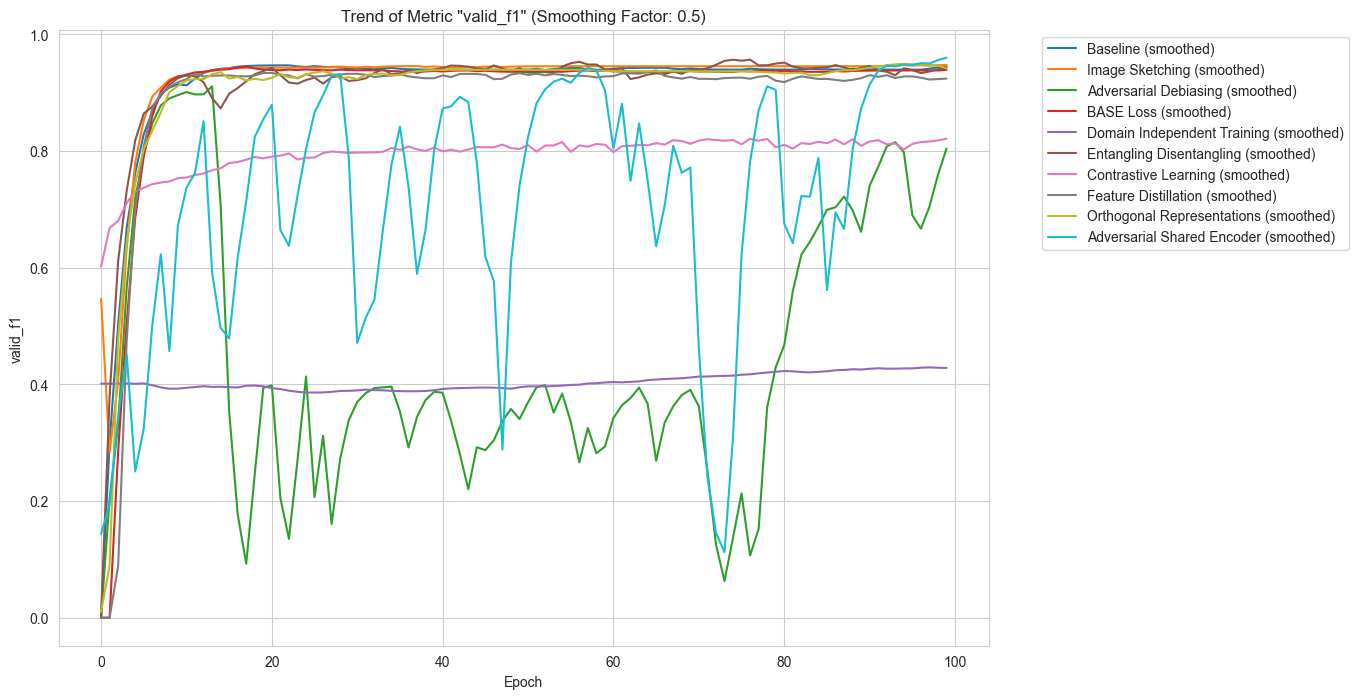

In [13]:
plot_metric(lfw_nose_099, "valid_f1", smoothing_factor=0.5)

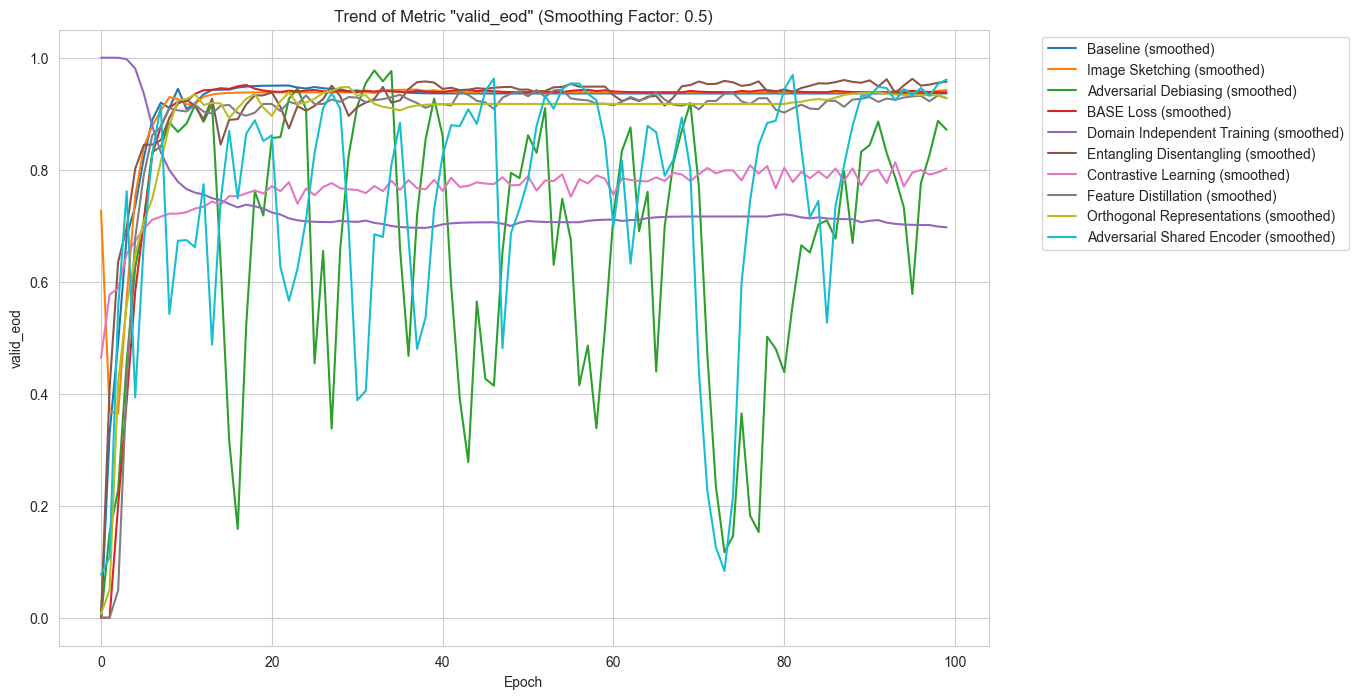

In [14]:
plot_metric(lfw_nose_099, "valid_eod", smoothing_factor=0.5)